In [1]:
import os
import sys
import random
from langchain_community.vectorstores import Chroma
from IPython.display import display, Markdown

current_dir = os.getcwd()
kit_dir = os.path.abspath(os.path.join(current_dir, ".."))
repo_dir = os.path.abspath(os.path.join(kit_dir, ".."))

sys.path.append(kit_dir)
sys.path.append(repo_dir)

from complex_rag.src.document_retrieval import DocumentRetrieval
from complex_rag.src.rag import COMPLEXRAG

CONFIG_PATH = os.path.join(kit_dir, "config.yaml")
PROMPTS_PATH = os.path.join(kit_dir, "prompts")

from datasets import load_dataset

rag_dataset = load_dataset("neural-bridge/rag-dataset-12000")
random.seed(123)
questions = rag_dataset["train"]["question"][:100]
answers = rag_dataset["train"]["answer"][:100]

/Users/codym/CAP/aisk_forked/ai-starter-kit/complex_rag_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-31 15:04:12,230 [INFO] - PyTorch version 2.3.0 available.


In [2]:
documentRetrieval = DocumentRetrieval()
*_, embedding_model_info, retrieval_info, _ = documentRetrieval.get_config_info()
embeddings = documentRetrieval.load_embedding_model()

In [3]:
vectorstore = Chroma(
    persist_directory=kit_dir
    + "/data/rag_dataset_12000_train_100samples_1000_100.chromadb",
    embedding_function=embeddings,
)

2024-05-31 15:04:15,620 [INFO] - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


In [4]:
# instantiate rag
rag = COMPLEXRAG(
    config=CONFIG_PATH,
    prompts_path=PROMPTS_PATH,
    embeddings=embeddings,
    vectorstore=vectorstore,
)

# Initialize chains
rag.initialize()

# Build nodes
workflow = rag.create_rag_nodes()
print(workflow)

# Build graph
app = rag.build_rag_graph(workflow)

input_variables=['context', 'question'] template='<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are an assistant for question-answering tasks. \nUse the following pieces of retrieved contexts to answer the question.  If asked about dates, expect them to be in tables and assume the format to be mm/yy.  If the information that is relevent to answering the question does not appear in the retrieved contexts, say "Could not find information.".  Provide a concise answer to the question.  Do not provide any information that is not asked for in the question. <|eot_id|><|start_header_id|>user<|end_header_id|>\nQuestion: {question} \nContext: {context} \n\\n ------- \\n\nAnswer: <|eot_id|><|start_header_id|>assistant<|end_header_id|>\n'


2024-05-31 15:04:17,997 [INFO] - Browser listening on: ws://127.0.0.1:50419/devtools/browser/d1ddf4da-64e5-4209-a50c-6e917f9d7fb8
2024-05-31 15:04:20,807 [INFO] - terminate chrome process...



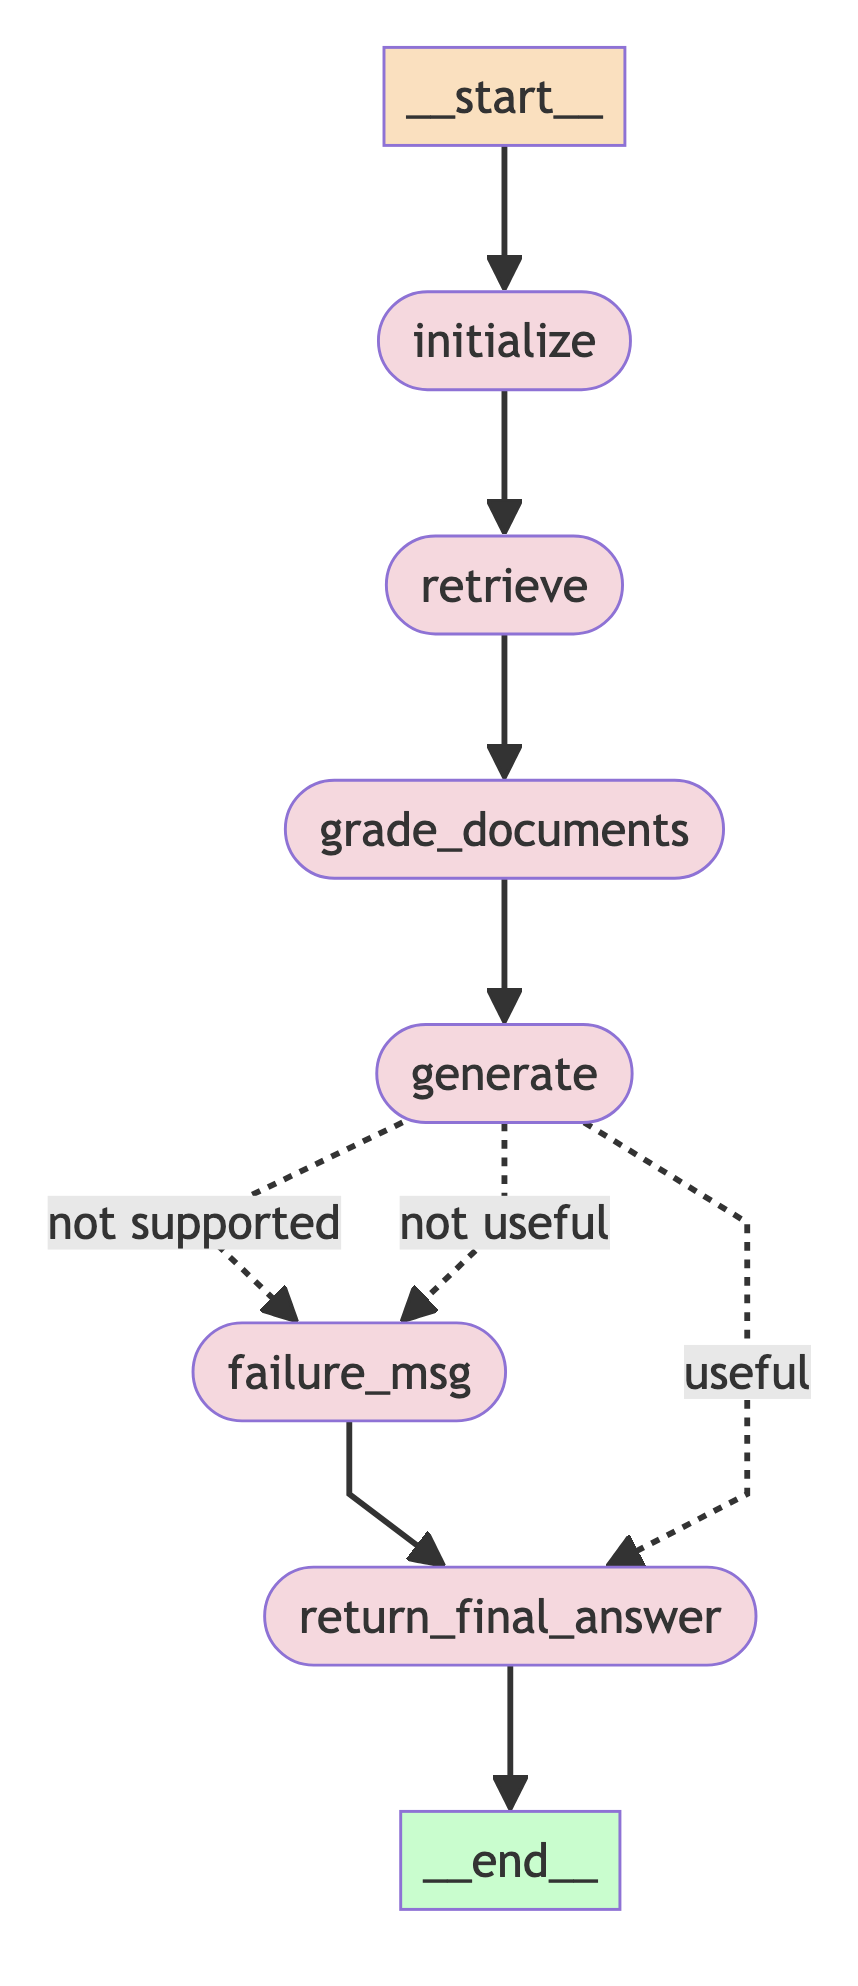

In [5]:
rag.display_graph(app)

In [6]:
idx = random.randint(0, len(questions))

response = rag.call_rag(app, question=questions[idx])

display(Markdown("---Response---"))
display(Markdown(response["answer"]))
display(Markdown("---Groud Truth---"))
display(Markdown(answers[idx]))

---Initializing---
How did Dan Foley feel about his portrayal on the Survivor TV show?
---RETRIEVING FOR QUESTION---
How did Dan Foley feel about his portrayal on the Survivor TV show?
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GENERATING---
---ANSWERING---
How did Dan Foley feel about his portrayal on the Survivor TV show?
---DOCS---
length:  0

Could not find information.
---CHECK FOR HALLUCINATIONS---
---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS---


In [ ]:
idx = random.randint(0, len(questions))

response = rag.call_rag(app, question=questions[idx])

display(Markdown("---Response---"))
display(Markdown(response["answer"]))
display(Markdown("---Groud Truth---"))
display(Markdown(answers[idx]))

In [ ]:
idx = random.randint(0, len(questions))

response = rag.call_rag(app, question=questions[idx])

display(Markdown("---Response---"))
display(Markdown(response["answer"]))
display(Markdown("---Groud Truth---"))
display(Markdown(answers[idx]))

In [ ]:
response = rag.call_rag(app, question="Why is there a monster truck in my driveway?")

display(Markdown("---Response---"))
display(Markdown(response["answer"]))